Class 1 - No squeezing (ε < 1%)
Class 2 - Minor squeezing (1% ≤ ε < 2.5%)
Class 3 - Severe to extreme squeezing (ε ≥ 2.5%)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

In [2]:
df = pd.read_csv('tunnel_data.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'tunnel_data.csv'

In [ ]:
df = df.drop(columns=["No"], errors="ignore") 

In [ ]:
df.isnull().sum()

D (m)     0
H(m)      0
Q         0
K(MPa)    0
ε (%)     0
Class     0
dtype: int64

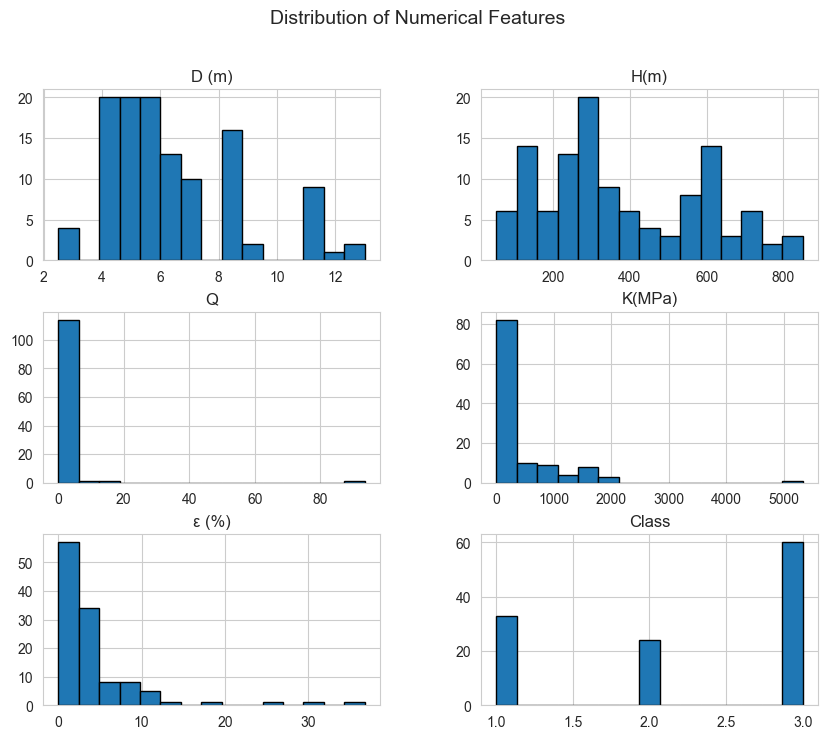

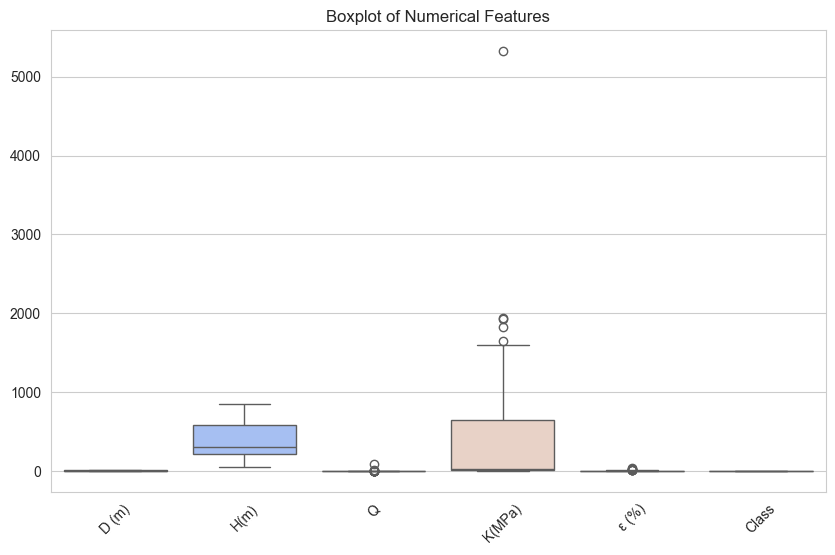

In [ ]:
# Set style
sns.set_style("whitegrid")

# 🔹 Histogram for numerical features
df.drop(columns=["No"], errors="ignore").hist(figsize=(10, 8), bins=15, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

# 🔹 Boxplot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=["No"], errors="ignore"), palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()


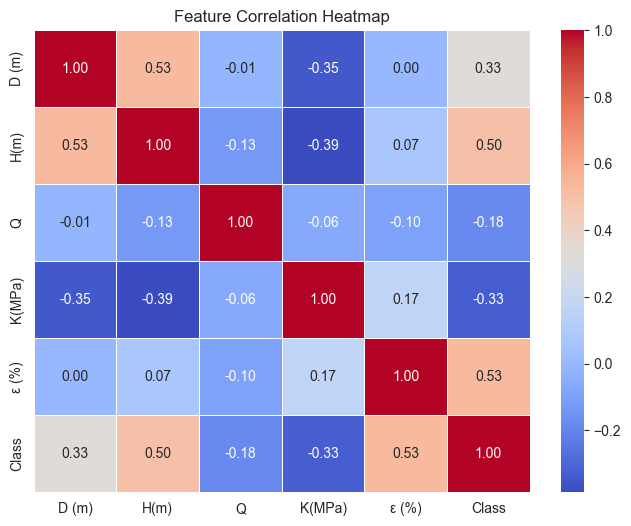

In [ ]:
corr_matrix = df.drop(columns=["No"], errors="ignore").corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
df.describe()

,D (m),H(m),Q,K(MPa),ε (%),Class
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,6.351282,378.924786,1.421615,374.410171,3.925214,2.230769
std,2.354366,207.212509,8.761644,711.304516,5.465696,0.864876
min,2.500000,52.000000,0.001000,0.000000,0.000000,1.000000
25%,4.600000,220.000000,0.020000,9.800000,0.750000,1.000000
50%,5.800000,312.000000,0.060000,26.190000,2.500000,3.000000
75%,8.700000,580.000000,0.400000,648.000000,4.500000,3.000000
max,13.000000,850.000000,93.500000,5324.000000,36.730000,3.000000


In [ ]:
print("Class Distribution Before Balancing:")
print(df["Class"].value_counts())

Class Distribution Before Balancing:
Class
3    60
1    33
2    24
Name: count, dtype: int64


In [ ]:
df_class1 = df[df["Class"] == 1]
df_class2 = df[df["Class"] == 2]
df_class3 = df[df["Class"] == 3]

df_class2_upsampled = resample(df_class2, replace=True, n_samples=len(df_class3), random_state=42)

df_balanced = pd.concat([df_class1, df_class2_upsampled, df_class3])

# 🔹 Check class distribution after balancing
print("\nClass Distribution After Balancing:")
print(df_balanced["Class"].value_counts())


Class Distribution After Balancing:
Class
2    60
3    60
1    33
Name: count, dtype: int64


In [ ]:
X = df[["D (m)", "H(m)", "Q", "K(MPa)", "ε (%)"]]
y = df["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
svm_model = SVC(kernel="rbf", C=10, gamma="scale", class_weight="balanced")
svm_model.fit(X_train, y_train)

SVC(C=10, class_weight='balanced')

In [ ]:
y_pred_svm = svm_model.predict(X_test)

Text(0.5, 1.0, 'SVM Model - Confusion Matrix')

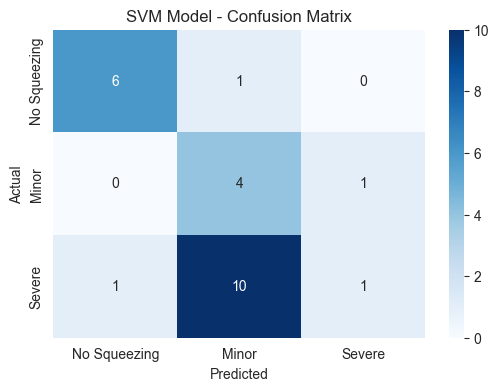

In [ ]:

# 🔹 Confusion Matrix for SVM
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap="Blues", fmt="d",
            xticklabels=["No Squeezing", "Minor", "Severe"],
            yticklabels=["No Squeezing", "Minor", "Severe"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Model - Confusion Matrix")

In [ ]:
# hyperparameter tuning
#support vector machine
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
print("\n🔹 SVM Model - Classification Report:")
print(classification_report(y_test, grid_predictions, target_names=["Class 1 (No Squeezing)", "Class 2 (Minor)", "Class 3 (Severe)"], zero_division=1))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.526 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.526 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
# hyperparameter tuning using randomized cv
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
random = RandomizedSearchCV(SVC(), param_grid, refit=True, verbose=3)
random.fit(X_train, y_train)
print(random.best_params_)
print(random.best_estimator_)
random_predictions = random.predict(X_test)
print("\n🔹 SVM Model - Classification Report:")

print(classification_report(y_test, random_predictions, target_names=["Class 1 (No Squeezing)", "Class 2 (Minor)", "Class 3 (Severe)"], zero_division=1))



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.526 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.526 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.632 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.556 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.556 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.789 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.842 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.579 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.611 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.611 total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;

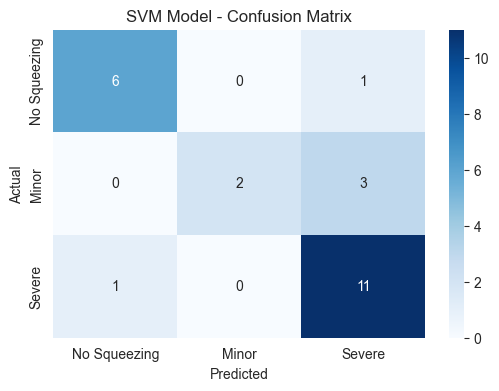

In [ ]:
# plot after hyperparameter tuning
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, grid_predictions), annot=True, cmap="Blues", fmt="d",
            xticklabels=["No Squeezing", "Minor", "Severe"],
            yticklabels=["No Squeezing", "Minor", "Severe"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Model - Confusion Matrix")
plt.show()